In [31]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib notebook

In [41]:
img_path = '/home/cassava_media_arts/monodepth_simpletests/0000000053_disp.jpeg'
npy_path = '/home/cassava_media_arts/monodepth_simpletests/0000000053_disp.npy'

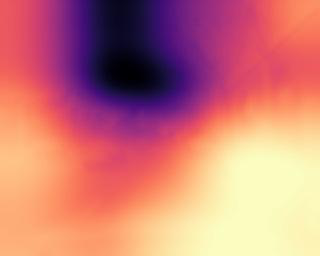

In [42]:
depth_map = Image.open(img_path)
depth_map

In [43]:
depth_map = np.load(npy_path)[0][0]
depth_map.shape

(256, 320)

In [44]:
img_scale = 1224/320
camera_matrix = np.array([[882.61644117/img_scale, 0,                      621.63358525/img_scale],
                          [0,                      882.61644117/img_scale, 524.38397862/img_scale],
                          [0,                      0,                      1             ]], dtype=np.float32)


In [45]:
# camera_matrix = np.array([[9.842439e+02, 0.000000e+00, 6.900000e+02],
#                           [0.000000e+00, 9.808141e+02, 2.331966e+02],
#                           [0.000000e+00, 0.000000e+00, 1.000000e+00]])

# camera_matrix = np.array([[9.037596e+02, 0.000000e+00, 6.957519e+02],
#                           [0.000000e+00, 9.019653e+02, 2.242509e+02],
#                           [0.000000e+00, 0.000000e+00, 1.000000e+00]])

# camera_matrix = camera_matrix * (320/306)

f_x = camera_matrix[0][0]
f_y = camera_matrix[1][1]
c_x = camera_matrix[0][2]
c_y = camera_matrix[1][2]

f_x, f_y, c_x, c_y

(230.74939, 230.74939, 162.51859, 137.09386)

In [46]:
θ_x = 2 * np.arctan(512/f_x)
θ_y = 2 * np.arctan(160/f_y)

α_x = (np.pi - θ_x)/2
α_y = (np.pi - θ_y)/2

In [50]:
point_cloud = []

k = 0
y_threshold = 1

for i in range(depth_map.shape[0]):
    for j in range(depth_map.shape[1]):
        if k % 3 == 0:
            γ_x = α_x + (j * θ_x) / 1024
            γ_y = α_y + (i * θ_y) / 320
            z = depth_map[i][j]
            x = z / np.tan(γ_x)
            y = z / np.tan(γ_y)
#             if y < y_threshold:
#                 point_cloud.append([x, y, z])
            point_cloud.append([x, y, z])
        k += 1
        
point_cloud = np.array(point_cloud)
point_cloud

array([[22.18191514,  6.93184848,  9.99699879],
       [21.7896585 ,  6.93184782,  9.99699783],
       [21.40870728,  6.93183922,  9.99698544],
       ...,
       [ 4.80801132, -3.76355505,  9.99942398],
       [ 4.72550808, -3.76355397,  9.99942112],
       [ 4.64352835, -3.76355361,  9.99942017]])

In [51]:
# point_cloud = []

# k = 0
# for i in range(depth_map.shape[0]):
#     for j in range(depth_map.shape[1]):
#         if k % 5 == 0:
#             z = depth_map[i][j]
#             x = ((c_x - j) * z) / f_x
#             y = ((c_y - i) * z) / f_y
#             point_cloud.append([x, y, z])
#         k += 1
        
# point_cloud = np.array(point_cloud)
# point_cloud

<IPython.core.display.Javascript object>


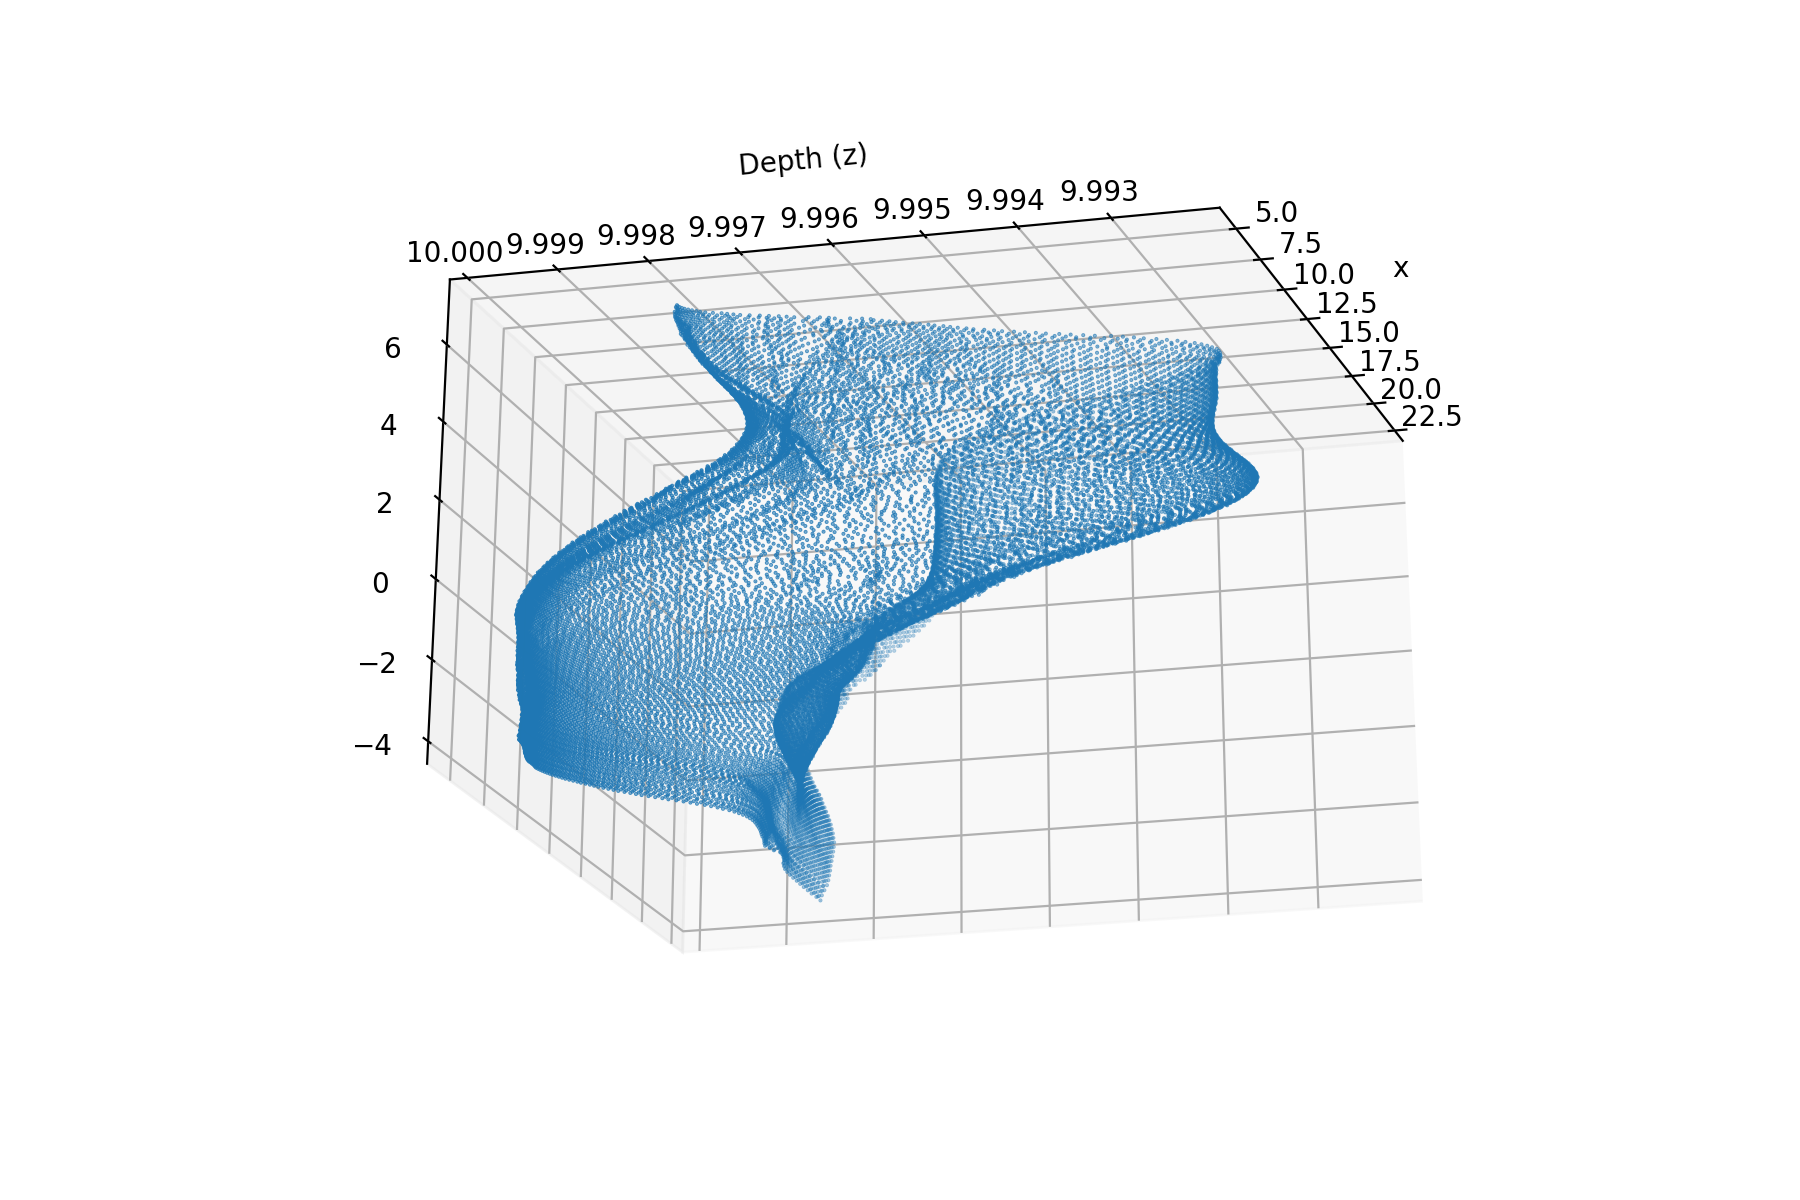

In [53]:
xs = point_cloud[:, 0]
ys = point_cloud[:, 1]
zs = point_cloud[:, 2]
size = [0.2]*len(xs)

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
# ax = fig.add_subplot(111)

ax.set_xlabel('x')
ax.set_ylabel('Depth (z)')
# ax.set_zlabel('y')
ax.scatter(xs, zs, ys, cmap=cm.coolwarm, s=size)
# plt.scatter(xs, zs, cmap=cm.coolwarm, s=size)